<center><font size=6> Bank Churn Prediction </font></center>

# Advance Machine Learning: Credit Card Users Churn Prediction Neural Network
###AI and Machine Learning Postgraduate Course by Great Learning
###Presented by: Teresa Fitzgerald
####04/27/2024

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [213]:
# Convert ipynb to HTML in Colab
from google.colab import files

# # Upload ipynb
INN_Learner_Notebook_Full_code_version = files.upload()

# # Convert ipynb to HTML
import subprocess
# Assuming there's only one uploaded file
file_name = list(INN_Learner_Notebook_Full_code_version.keys())[0]

!pip install nbconvert
_ = subprocess.run(["jupyter", "nbconvert", file_name, "--to", "html"])

# Construct the HTML file name
html_file_name = file_name.split('.')[0] + ".html"

# Download the HTML
files.download(html_file_name)


Saving INN_Learner_Notebook_Full_code_version (3).ipynb to INN_Learner_Notebook_Full_code_version (3) (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# #Installing the libraries with the specified version.
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user --no-warn-script-location

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()
from keras.layers import Dense

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

##Connect to Google Drive

In [2]:
# uncomment and run the following lines in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [3]:
# loading the dataset
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

###Check the shape(rows and columns)

In [4]:
data.shape

(10000, 14)

There are 10,000 rows and 14 columns in the dataset

###check for missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are not missing values in the dataset

###Check for Nan values

In [5]:

# Check for NaN values in the entire DataFrame
nan_values = data.isna().sum().sum()

if nan_values > 0:
    print("NaN values found in the dataset.")
    # print the columns with NaN values
    print("Columns with NaN values:")
    print(data.columns[data.isna().any()])
    #  print the rows with NaN values
    print("Rows with NaN values:")
    print(data[data.isna().any(axis=1)])
else:
    print("No NaN values found in the dataset.")


No NaN values found in the dataset.


###Check for duplicates

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

###Check a few rows randomly

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


###Copy the data

In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

###Check the datatype

###Observation:
The Surname, Geography column, Gender are of type objects, the rest of the columns are of int64 and float datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Observation : Inbalance class

This shows a complete imbalance of classes. There are 79.63% of (0) instances and only 20.37%  (1) instances.

In [ ]:

#checking the percentage of Exited
(data.Exited.value_counts())/(data.Exited.count())

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

###Number of distinct categories of the Exited class.,


In [ ]:
####Number of distinct categories or class Exited.,
data['Exited'].nunique()

2

###Analysis of the Exited class

 Customers who have exited tend to have a higher average balance (Mean amount per Exited) compared to those who have not exited (Mean amount per normal transactions). Additionally, the total amount lost due to exited customers is significantly lower compared to the total amount from normal transactions, indicating a potential loss of revenue due to customer exits.

In [ ]:
print("*********Losses due to Exited:************\n")
print("Total amount lost to Exited")
print(data.Balance[data.Exited == 1].sum())
print("Mean amount per Exited")
print(data.Balance[data.Exited == 1].mean())
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(data.Balance[data.Exited == 0].sum())
print("Mean amount per normal transactions")
print(data.Balance[data.Exited == 0].mean())

*********Losses due to Exited:************

Total amount lost to Exited
185588094.63
Mean amount per Exited
91108.53933726068
Compare to normal transactions:
Total amount from normal transactions
579270798.25
Mean amount per normal transactions
72745.2967788522


####Observation about Exited
20 percent of the total customers exited.
0    0.7963
1    0.2037

<Axes: xlabel='Exited'>

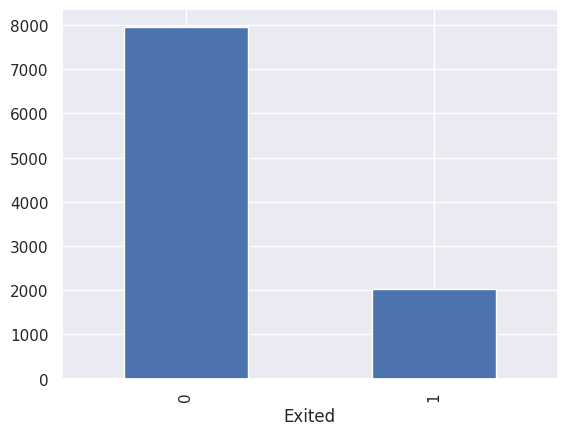

In [ ]:
#visual representation of instances per class
data.Exited.value_counts().plot.bar()

###Summary statistics for numerical features

* CreditScore: The credit scores range from 350 to 850, with an average around 650. The standard deviation indicates a moderate amount of variability in credit scores among the customers.

* Age: The ages range from 18 to 92, with a mean around 39 years. The standard deviation suggests a moderate spread in ages among the customers.

* Tenure: This represents how many years the customer has been with the bank. It ranges from 0 to 10, with an average around 5 years. The standard deviation indicates variability in tenure lengths among customers.

* Balance: Account balances vary widely, ranging from 0 to 250,898.09 currency units. The average balance is 76,485.89, with a relatively high standard deviation, indicating significant variability in account balances among customers.

* NumOfProducts: Most customers number of products with the bank  ranges from 1 to 4, with an average around 1.53. The standard deviation suggests some variability in the number of products held by customers.

* HasCrCard:The mean suggests that approximately 70.5% of customers have a credit card.

* IsActiveMember: The mean indicates that around 51.5% of customers are active members.

In [ ]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(data.describe().T)


Summary statistics for numerical features:
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+0

###Observation about the categorial columns
The observations highlight the diversity in surnames, uneven geographical distribution with a dominance of entries from France, and a gender bias towards males in the provided dataset. Understanding these demographic characteristics is essential for conducting thorough analyses and making informed decisions in areas such as marketing, customer segmentation, and product development

In [ ]:
# Statistical summary of the categorical columns in the data
data.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
#checking the percentage of exited
(data.Exited.value_counts())/(data.Exited.count())

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

###Summary statistics for categorical features

Surname: There are 10,000 entries in the dataset, with 2,932 unique surnames. The most common surname is "Smith," occurring 32 times. This suggests a diverse range of surnames within the dataset, with some common and some rare.

Geography: The dataset contains information from three geographical locations. France appears to be the most prevalent, with 5,014 occurrences. This implies that the dataset may be skewed towards customers from France compared to the other two locations.

Gender: The dataset includes information about gender, with two categories: Male and presumably Female (although not explicitly stated). There are 5,457 entries indicating Male gender. The distribution of genders suggests a slight skew towards males in the dataset.

###Check Unique values for object type
There are 3 unique Geography regions, two unique geners and 2932 unique surna

In [ ]:
#check for unique values for object columns
data.select_dtypes(include="object").nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

###Check for unique values for numerical features


* CreditScore: There are 460 unique credit scores in the dataset. This suggests some variability in credit scores among customers but there are likely some common credit scores that occur more frequently.

* Age: There are 70 unique ages represented in the dataset. This indicates a range of ages among the customers, with some ages being more common than others.

* Tenure: There are 11 unique values for tenure, which represents the number of years a customer has been with the bank. This suggests that tenure is discretized into specific categories rather than being continuous.

* Balance: There are 6,382 unique balance values in the dataset. This indicates a wide range of account balances among the customers, with some balances being more common than others.

* NumOfProducts: There are 4 unique values for the number of products each customer has with the bank. This suggests that customers have a discrete number of products, ranging from 1 to 4.

In [ ]:
#check for unique values for numerical columns
data.select_dtypes(exclude="object").nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
nan_values = data.isna().sum().sum()

if nan_values > 0:
    print("NaN values found in the dataset.")
    # Optionally, print the columns with NaN values
    print("Columns with NaN values:")
    print(data.columns[data.isna().any()])
    # Optionally, print the rows with NaN values
    print("Rows with NaN values:")
    print(data[data.isna().any(axis=1)])
else:
    print("No NaN values found in the dataset.")


No NaN values found in the dataset.


##Pre_EDA data processing

####Dropping no relevant columns

Lets drop columns that are not necessary

In [6]:

# Drop irrelevant columns
data.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<!-- # Summary statistics for categorical features -->

#### <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### Univariate Analysis

####Function to create label plot

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

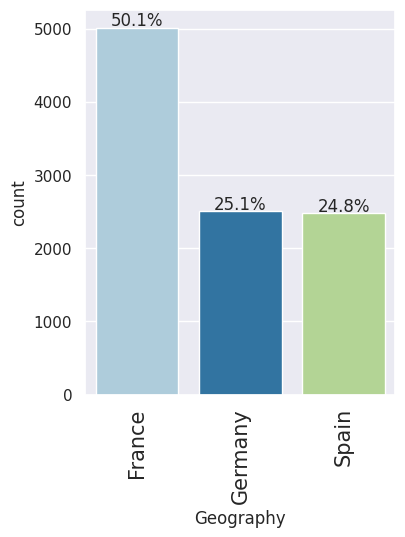

In [ ]:
labeled_barplot(data, "Geography", perc=True)

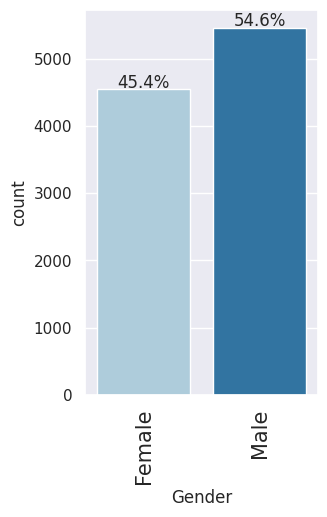

In [ ]:
labeled_barplot(data, "Gender", perc=True)

####Function to plot a boxplot and a histogram along the same scale

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

###Observation CreditScore

 The median is evenly  positioned within the box, it suggests that roughly half of the data points are below the median, and half are above it. This indicates symmetry in the data distribution.
Outliers at the left of the distribution suggest that there are unusually low values in the dataset relative to the rest of the data. The outliers on the left side suggest that there are some unusually low credit scores compared to the majority of the data.
The median credit score (652.0) is slightly higher than the average credit score (650.5288). The distribution of credit scores is slightly right-skewed, meaning there might be a few higher credit scores pulling the average up. However, since the difference between the median and average is relatively small, it indicates that the distribution is fairly symmetric overall.


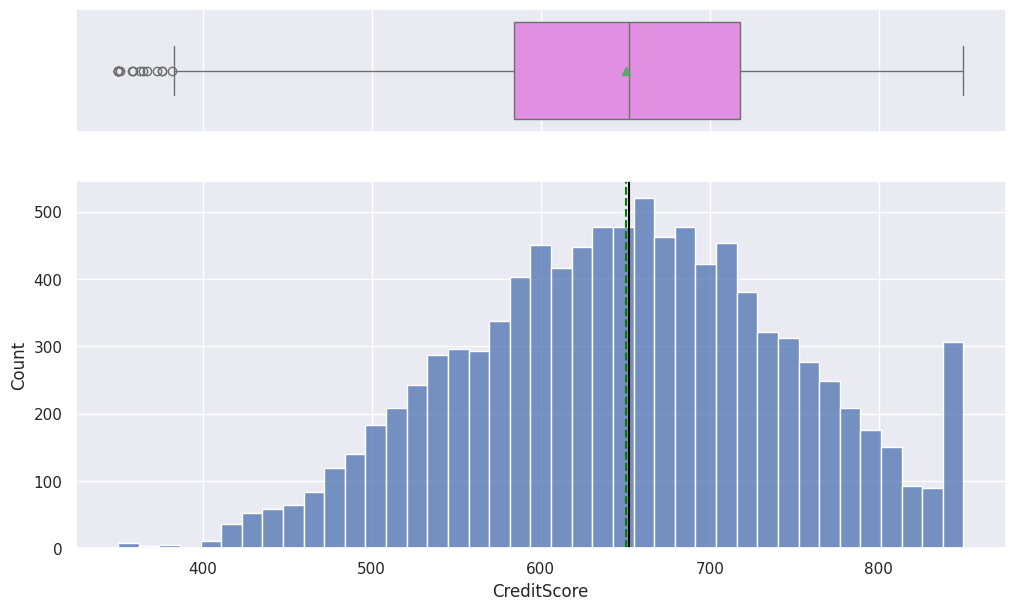

In [ ]:
# Observations on Credit score
histogram_boxplot(data, "CreditScore")

In [ ]:
# Calculate median and average credit score
median_credit_score = data['CreditScore'].median()
average_credit_score = data['CreditScore'].mean()

# Print the median and average credit score
print("Median Credit Score:", median_credit_score)
print("Average Credit Score:", average_credit_score)

Median Credit Score: 652.0
Average Credit Score: 650.5288


###Observation about age

The median age is 37.0. Approximately half of the individuals in the bank' customers are 37 years old or younger, and the other half are 37 years old or older.The average (mean) age is 38.9218. The data is  slightly right-skewed which indicates that there are a few older individuals with ages significantly higher than the majority of the population, pulling the average age up. The outliers at the right shows that there are individuals who age is significantly higher than the average.

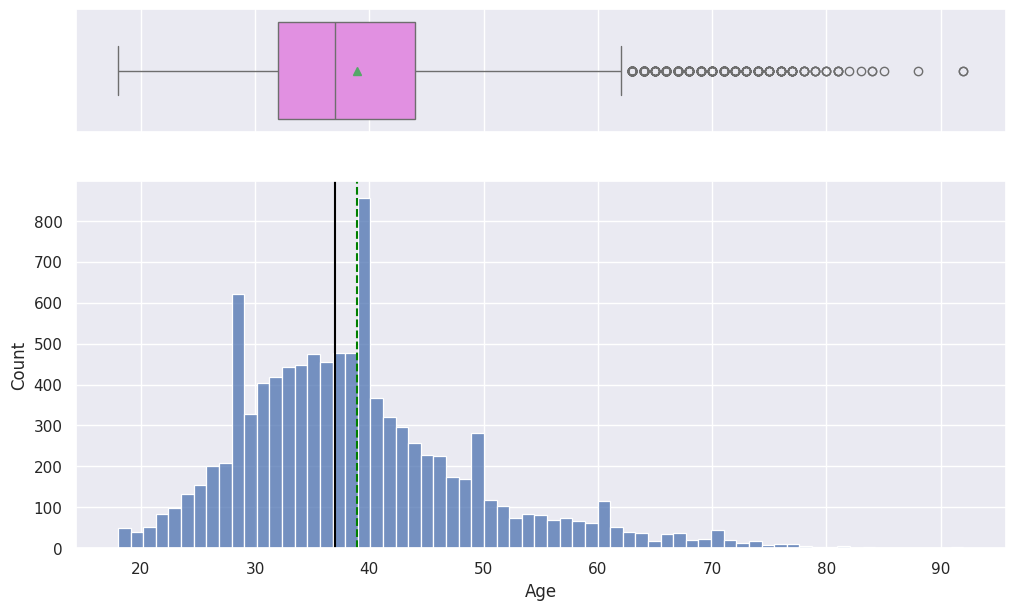

In [ ]:
# Observations on Age
histogram_boxplot(data, "Age")

In [ ]:
# Calculate median and average credit score
median_age = data['Age'].median()
average_age = data['Age'].mean()

# Print the median and average credit score
print("Median Age is :", median_age)
print("Average Age is :", average_age)

Median Age is : 37.0
Average Age is : 38.9218


In [ ]:
from scipy.stats import skew

# Calculate skewness of the dataset
skewness = skew(data['Age'])

# Print the skewness value
print("Age", skewness)

Age 1.0111685586628079


###Observation about Tenure

Tenures are fairly evenly distributed around the median and average values, with minimal skewness. The average Tenure is 38.9218, the media is 37, indicating a slight positive skew.

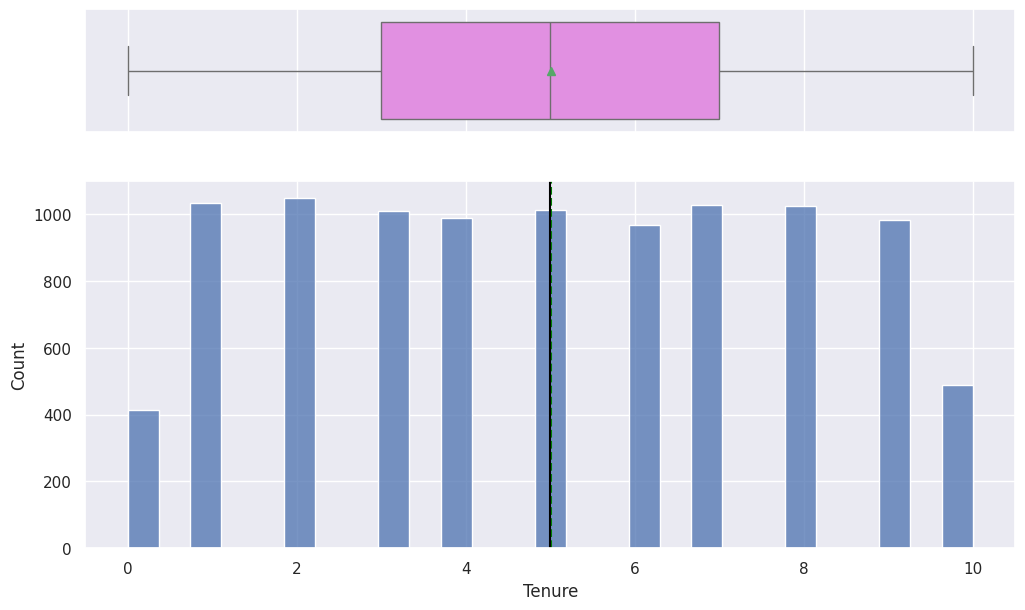

In [ ]:
# Observations on Credit score
histogram_boxplot(data, "Tenure")

In [ ]:
# Calculate median and average Tenure
median_Tenure = data['Tenure'].median()
average_Tenure = data['Tenure'].mean()

# Print the median and average credit score
print("Median Tenure is :",median_Tenure )
print("Average Tenure is :", average_Tenure)

Median Tenure is : 5.0
Average Tenure is : 5.0128


In [ ]:
from scipy.stats import skew

# Calculate skewness of Tenure
skewness = skew(data['Tenure'])

# Print the skewness value
print("Tenure skew is ", skewness)

Tenure skew is  0.010989809189781041


###Observation about Balance

Most customers balance is 76485.8, the median balance is 97198.54, the distribution is right skewed, some customers have a high balance. Over 3500 customers have small balances.



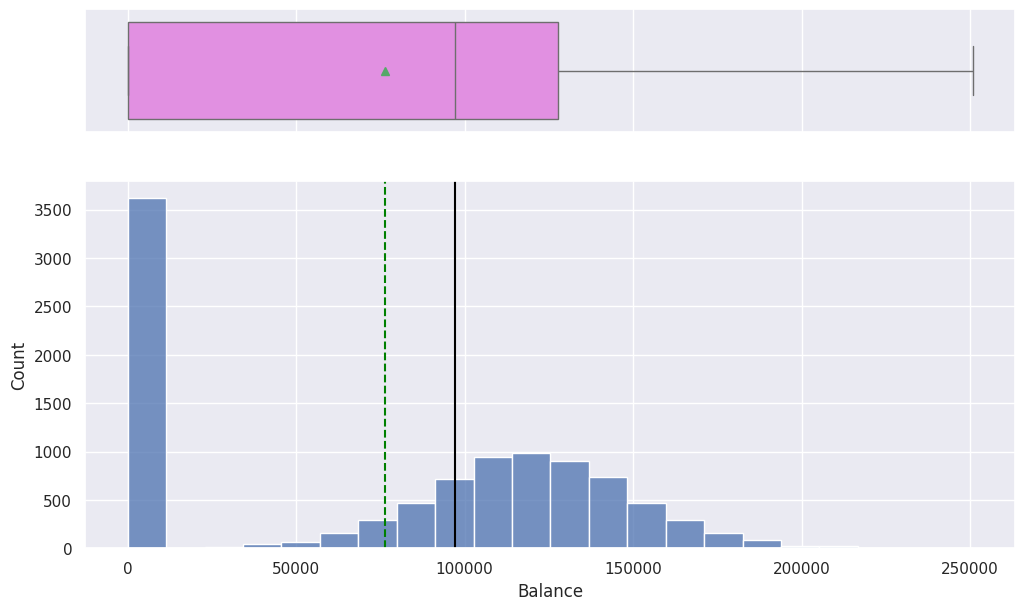

In [ ]:
# Observations on Balance
histogram_boxplot(data, "Balance")

In [ ]:
# Calculate median and average Balance
median_Balance = data['Balance'].median()
average_Balance = data['Balance'].mean()

# Print the median and average credit score
print("Median Balance is :", median_Balance)
print("Average Balance is :", average_Balance)

Median Balance is : 97198.54000000001
Average Balance is : 76485.889288


###Observation regarding NumOfProducts

The mean of 1.53 shows that most customers have purchased slightly more than 1 product through the bank.Over 4000 customers have bought 2 products and a little over 5000 customers have bought only one product. Some customers have purchased multiple products, contributing to the average being slightly higher.Overall, the discrepancy between the median and average number of products indicates potential skewness and variability in the distribution of the number of products, suggesting further exploration may be warranted.

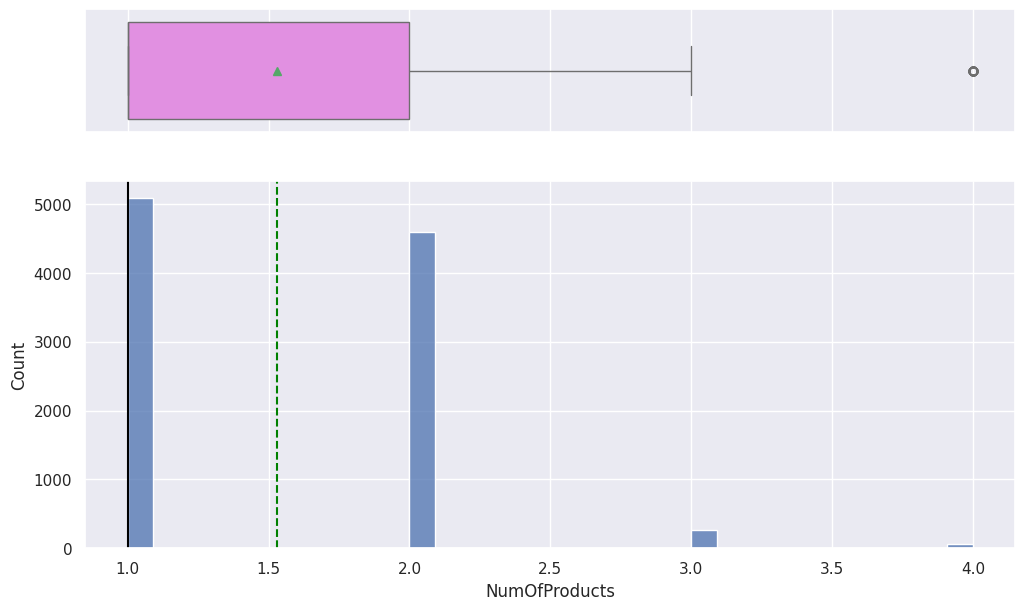

In [ ]:
# Observations on NumOfProducts
histogram_boxplot(data, "NumOfProducts")

In [ ]:
# Calculate median and average NumOfProducts
median_NumOfProducts = data['NumOfProducts'].median()
average_NumOfProducts = data['NumOfProducts'].mean()

# Print the median and average NumOfProducts
print("Median NumOfProducts is :", median_NumOfProducts)
print("Average NumOfProducts is :", average_NumOfProducts)

Median NumOfProducts is : 1.0
Average NumOfProducts is : 1.5302


###Observation regarding HasCrCard

The average (mean) value for the "HasCrCard" feature is 0.7055. This suggests that, on average, approximately 70.55% of customers have a credit card.

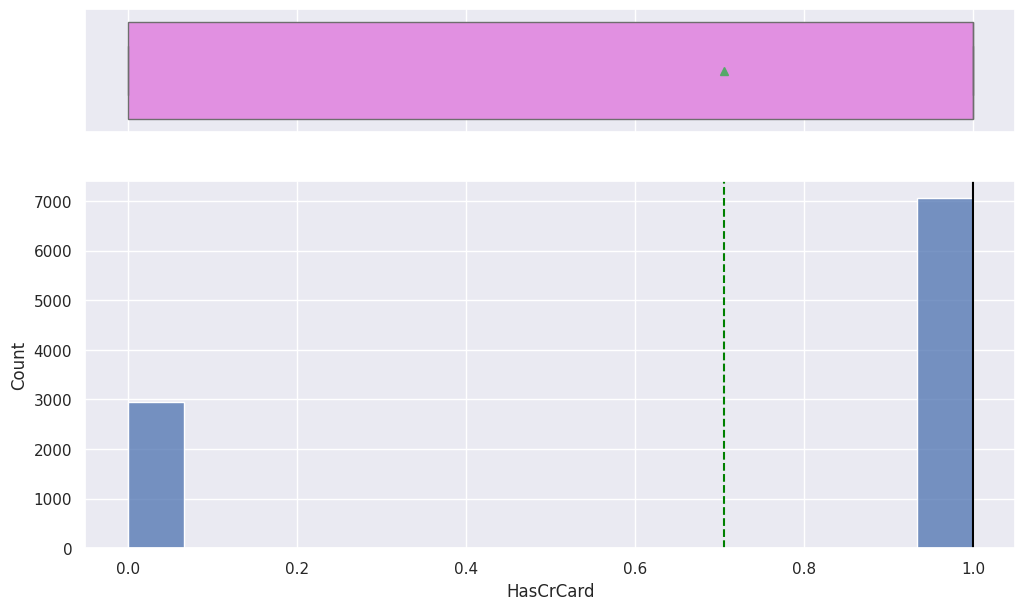

In [ ]:
# Observations on HasCrCard
histogram_boxplot(data, "HasCrCard")

In [ ]:
# Calculate median and average HasCrCard
median_HasCrCard = data['HasCrCard'].median()
average_HasCrCard = data['HasCrCard'].mean()

# Print the median and average HasCrCard
print("Median HasCrCard is :", median_HasCrCard)
print("Average HasCrCard is :", average_HasCrCard)

Median HasCrCard is : 1.0
Average HasCrCard is : 0.7055


###Observation regarding EstimatedSalary

The Estimated Salary is evenly distributed.The Median EstimatedSalary is 100193.915 and the
Average EstimatedSalary is 100090.239881

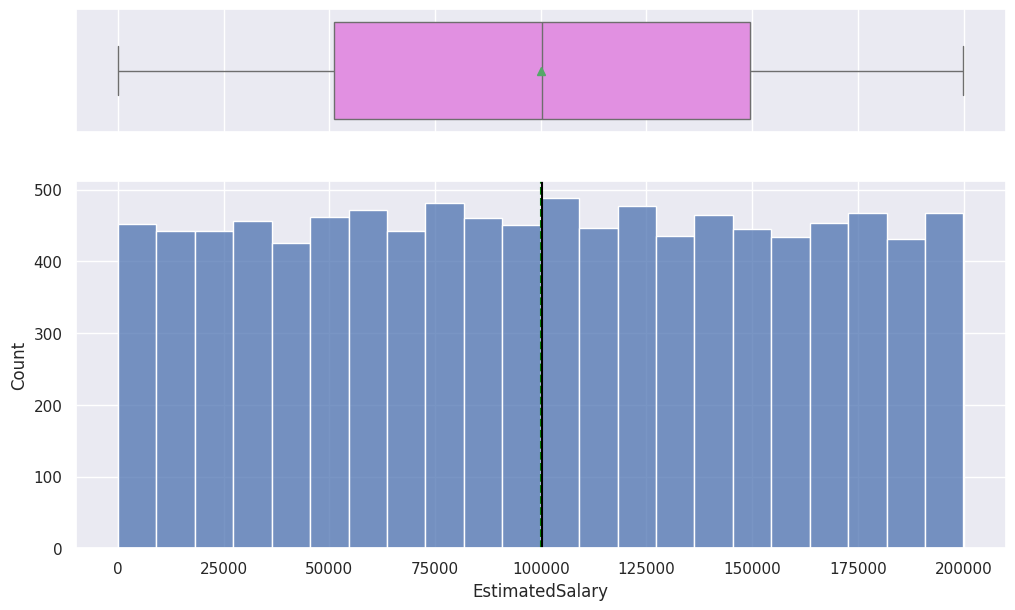

In [ ]:
# Observations on EstimatedSalary
histogram_boxplot(data, "EstimatedSalary")

In [ ]:
# Calculate median and EstimatedSalary
median_EstimatedSalary = data['EstimatedSalary'].median()
average_EstimatedSalary = data['EstimatedSalary'].mean()

# Print the median and average EstimatedSalary
print("Median EstimatedSalary is :", median_EstimatedSalary)
print("Average EstimatedSalary is :", average_EstimatedSalary)

Median EstimatedSalary is : 100193.915
Average EstimatedSalary is : 100090.239881


###Observation is active member

The data indicates that active membership is common among the bank's customers, with a majority being active members. This information can be valuable for assessing customer engagement and informing strategies to enhance customer satisfaction and loyalty.

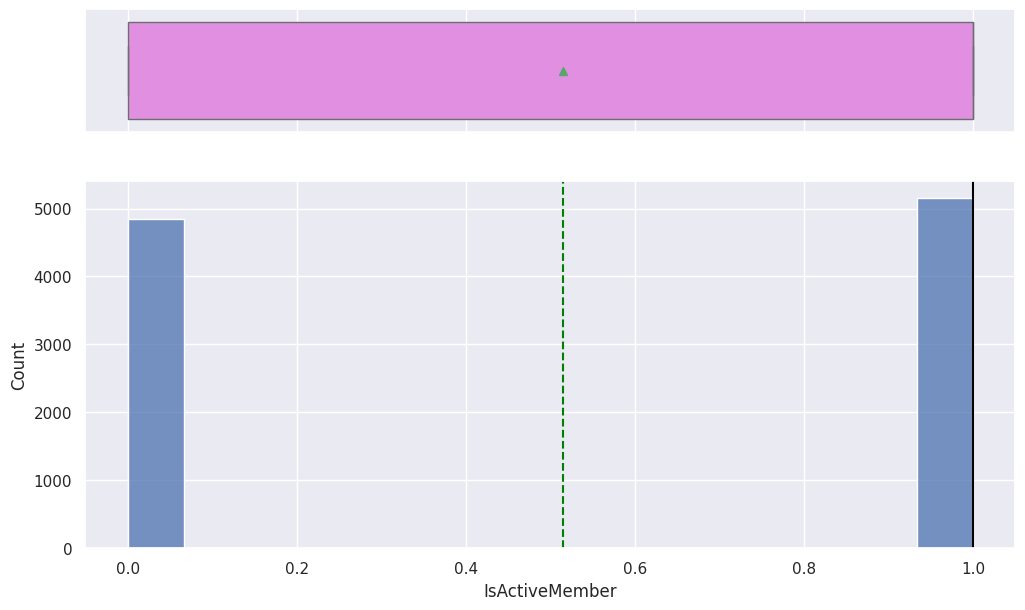

In [ ]:
# Observations on isActiveMember
histogram_boxplot(data, "IsActiveMember")

In [ ]:
# Calculate median and IsActiveMember
median_IsActiveMember= data['IsActiveMember'].median()
average_IsActiveMember = data['IsActiveMember'].mean()

# Print the median and average IsActiveMember
print("Median IsActiveMember is :", median_IsActiveMember)
print("Average IsActiveMember is :", average_IsActiveMember)

Median IsActiveMember is : 1.0
Average IsActiveMember is : 0.5151


###Observation about Exited

only a small proportion of the customers exited in the last 6 months.

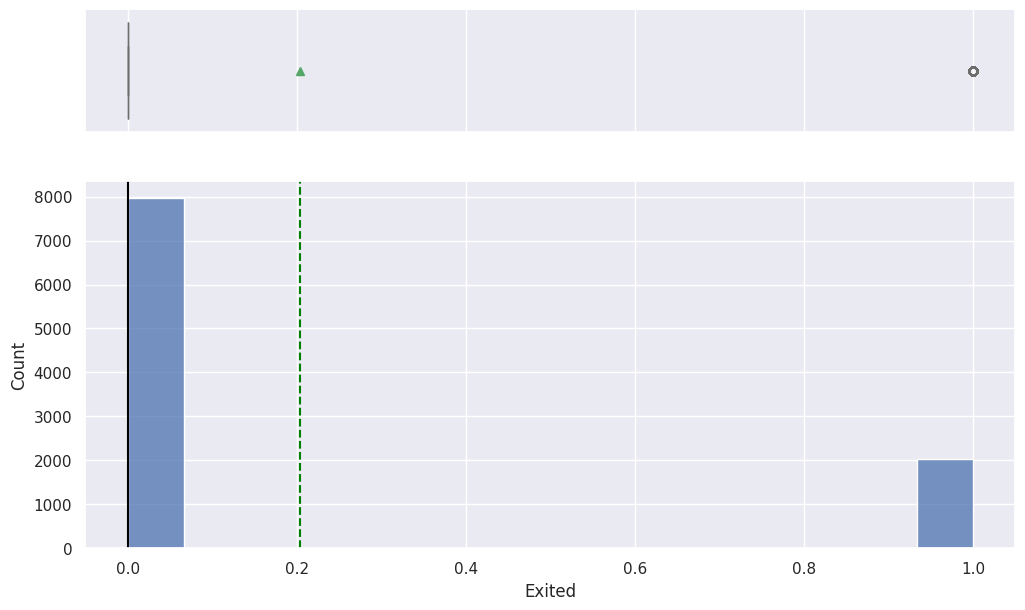

In [ ]:
# Observations on Exited
histogram_boxplot(data, "Exited")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##Bivariate Analsys

Bivariate analysis
Age: There is a moderate positive correlation between age and the likelihood of a customer leaving the bank. This suggests that older customers are more likely to exit the bank.
Balance: There is a positive correlation between account balance and the likelihood of a customer leaving the bank, although the correlation is not very strong. This might indicate that customers with higher balances are slightly more likely to leave.
IsActiveMember: There is a moderate negative correlation between being an active member and the likelihood of a customer leaving the bank. This suggests that active members are less likely to leave the bank.
NumOfProducts: There is a negative correlation between the number of products a customer has and the likelihood of them leaving the bank. This indicates that customers with more products are less likely to leave.
CreditScore: There is a weak negative correlation between credit score and the likelihood of a customer leaving the bank. This suggests that customers with higher credit scores are slightly less likely to leave.
Tenure, HasCrCard, and EstimatedSalary: These features have very weak correlations with the likelihood of a customer leaving the bank.

Exclusing the categorical variables because we are encoding in he model. we will encode the categorical variables separately for training your model.

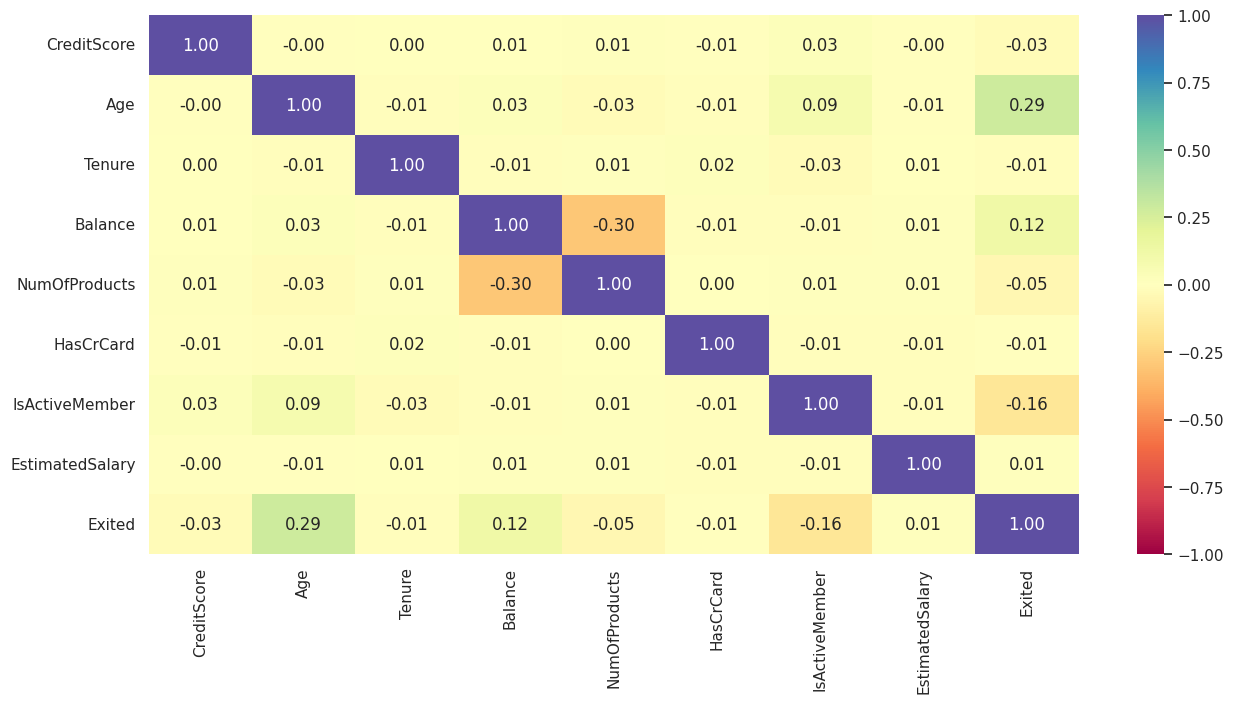

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude categorical variables for correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


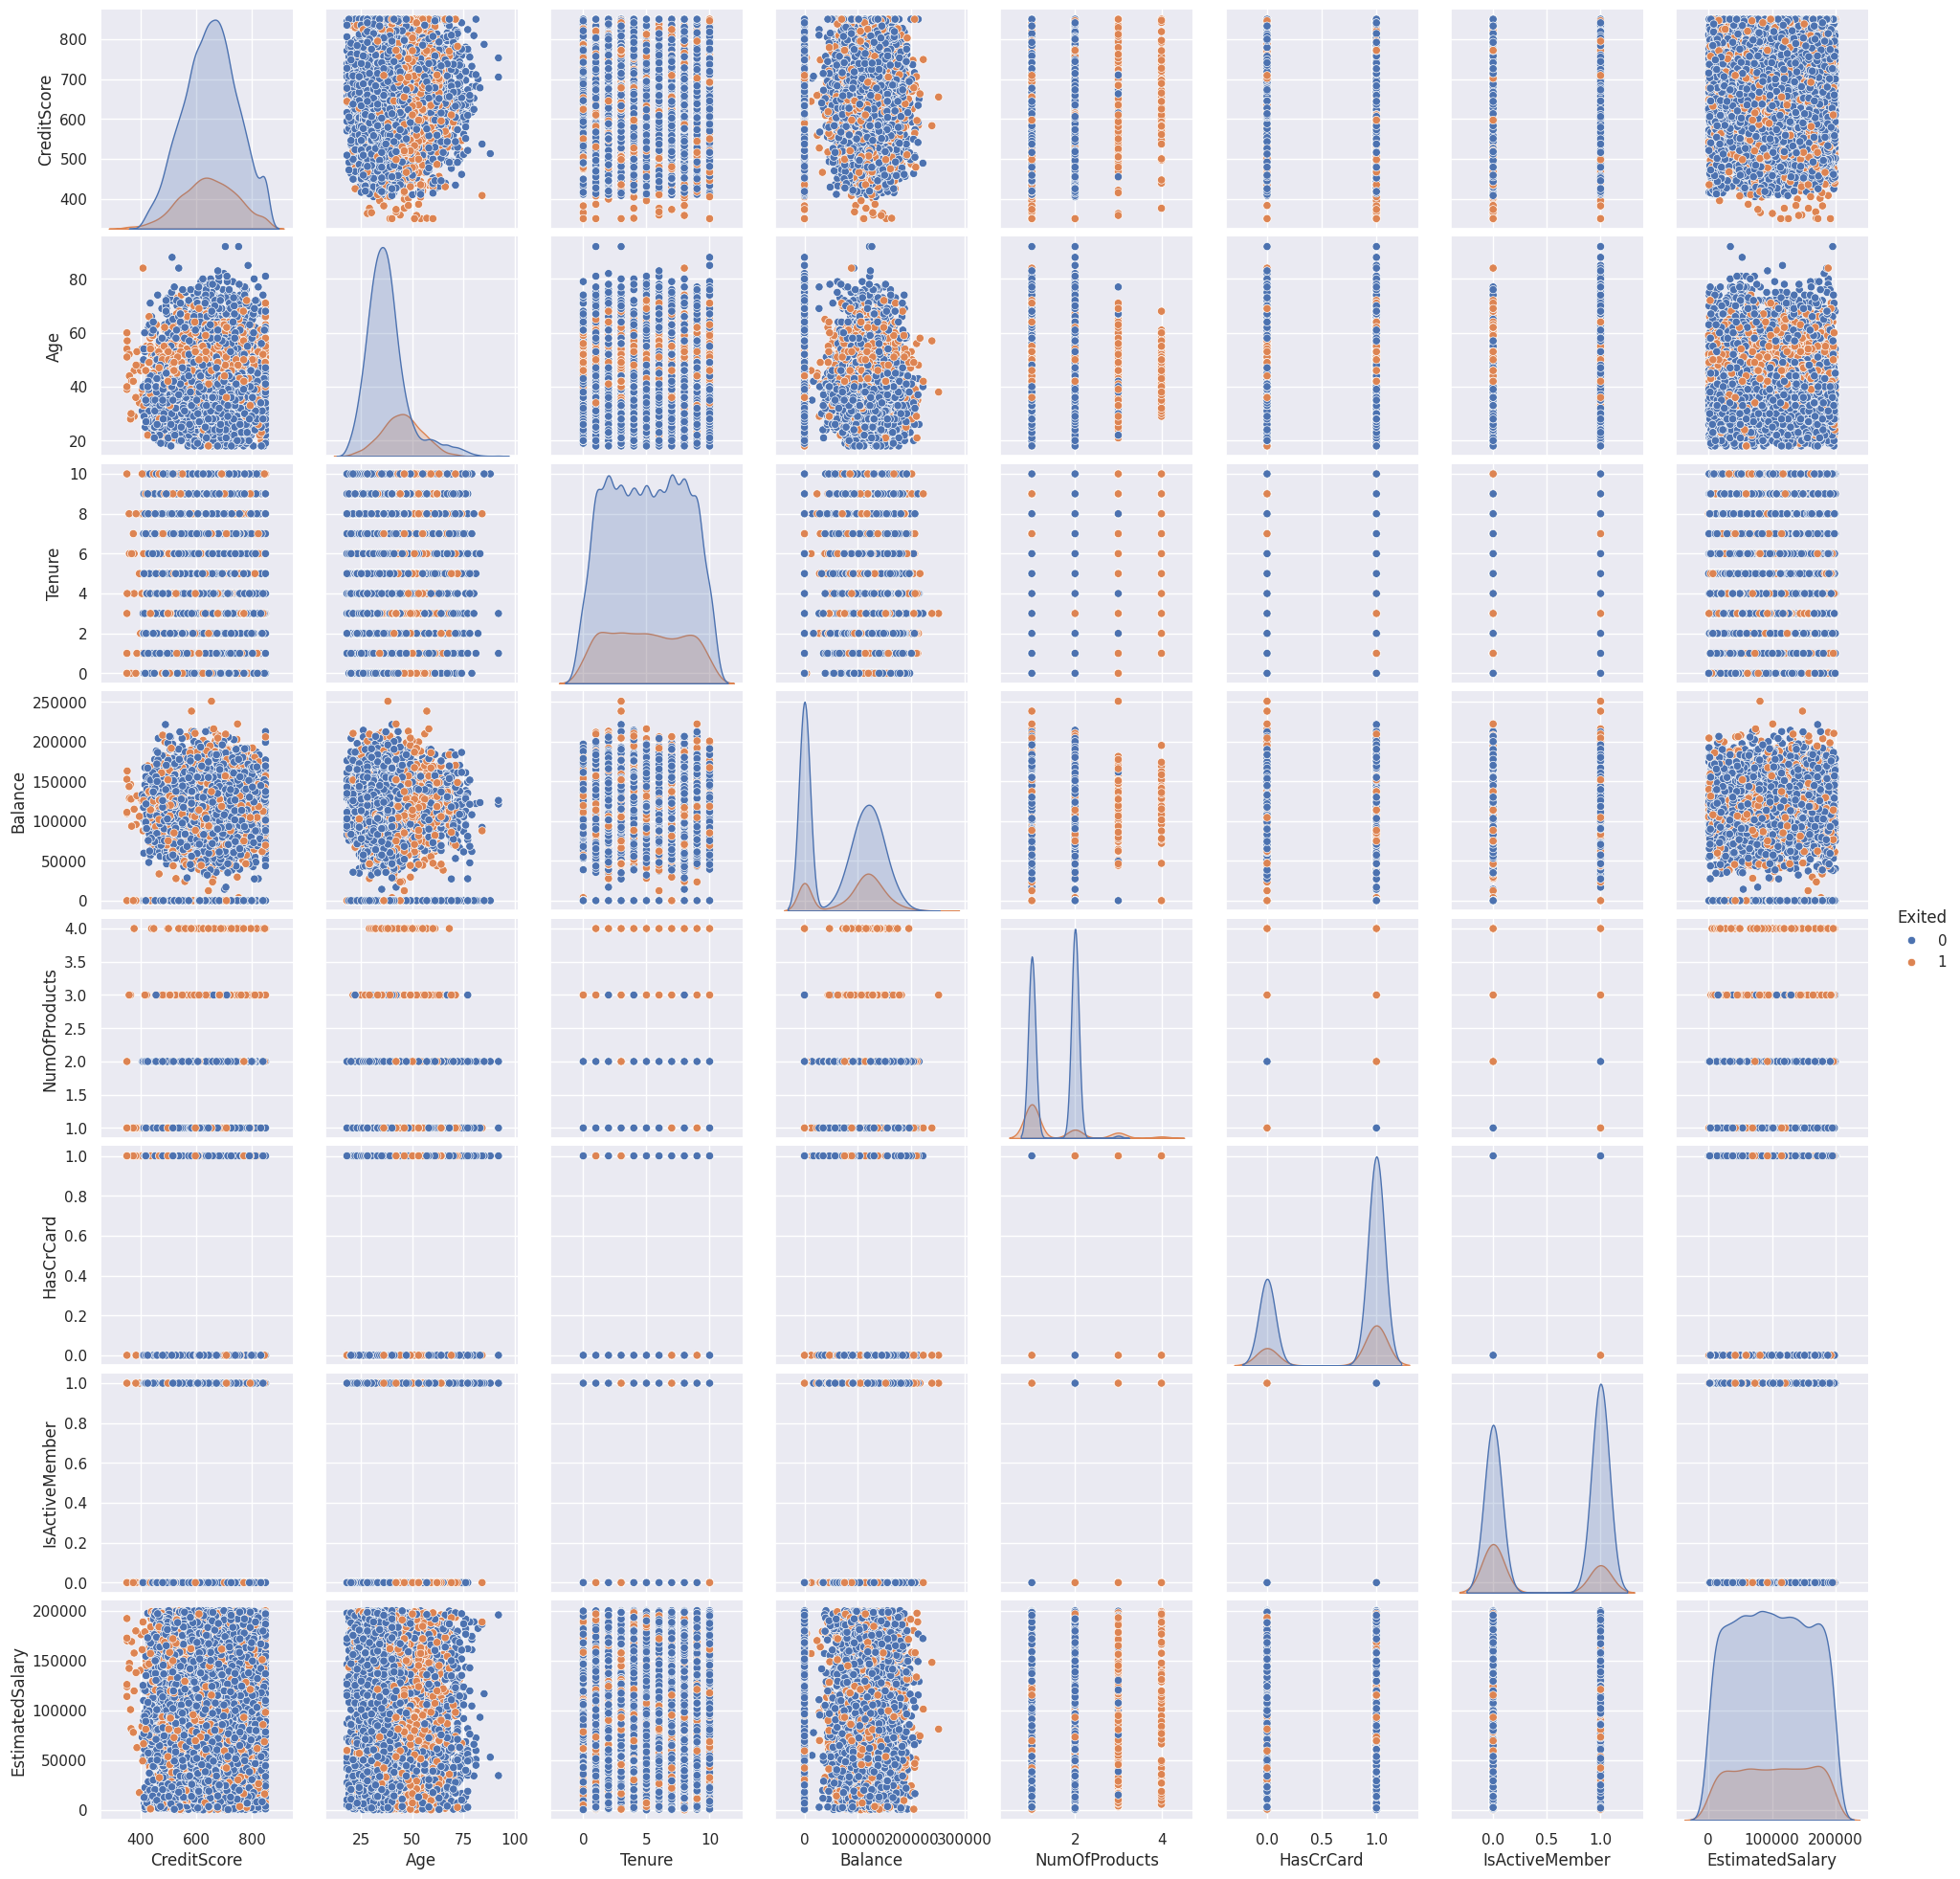

In [ ]:
sns.pairplot(data, hue="Exited")


<!-- ##Bivariate Analysis pre-processing -->

<!-- ### Bivariate Analysis -->

<!-- We need only to perform this analysis in the numerical features -->

In [ ]:


# Selecting relevant columns for correlation analysis
relevant_columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                    'Balance', 'HasCrCard', 'EstimatedSalary', 'IsActiveMember', 'Exited']
data_for_corr = data[relevant_columns]

# Compute the correlation matrix
corr_matrix = data_for_corr.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                 CreditScore       Age    Tenure  NumOfProducts   Balance  \
CreditScore         1.000000 -0.003965  0.000842       0.012238  0.006268   
Age                -0.003965  1.000000 -0.009997      -0.030680  0.028308   
Tenure              0.000842 -0.009997  1.000000       0.013444 -0.012254   
NumOfProducts       0.012238 -0.030680  0.013444       1.000000 -0.304180   
Balance             0.006268  0.028308 -0.012254      -0.304180  1.000000   
HasCrCard          -0.005458 -0.011721  0.022583       0.003183 -0.014858   
EstimatedSalary    -0.001384 -0.007201  0.007784       0.014204  0.012797   
IsActiveMember      0.025651  0.085472 -0.028362       0.009612 -0.010084   
Exited             -0.027094  0.285323 -0.014001      -0.047820  0.118533   

                 HasCrCard  EstimatedSalary  IsActiveMember    Exited  
CreditScore      -0.005458        -0.001384        0.025651 -0.027094  
Age              -0.011721        -0.007201        0.085472  0.28

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_exited(data, predictor, exited):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    exited_uniq = data[exited].unique()

    axs[0, 0].set_title("Distribution of target for exited=" + str(exited_uniq[0]))
    sns.histplot(
        data=data[data[exited] == exited_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of exited =" + str(exited_uniq[1]))
    sns.histplot(
        data=data[data[exited] == exited_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t exited")
    sns.boxplot(data=data, x=exited, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t exited")
    sns.boxplot(
        data=data,
        x=exited,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def stacked_barplot(data, predictor, Exited):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    Exited: Exited variable
    """
    count = data[predictor].nunique()
    sorter = data[Exited].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[Exited], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[Exited], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


###Observation gender and Exited
More females have exited than males

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


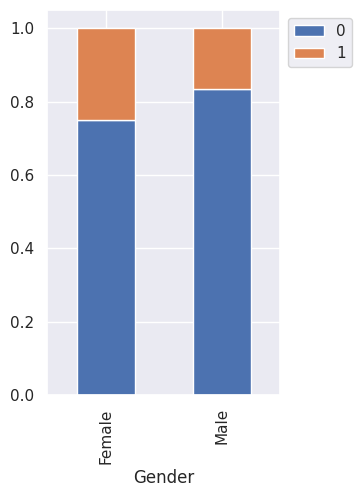

In [ ]:
stacked_barplot(data, "Gender", "Exited")


###Observation about Geography
Most exited customers are located in Germany

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


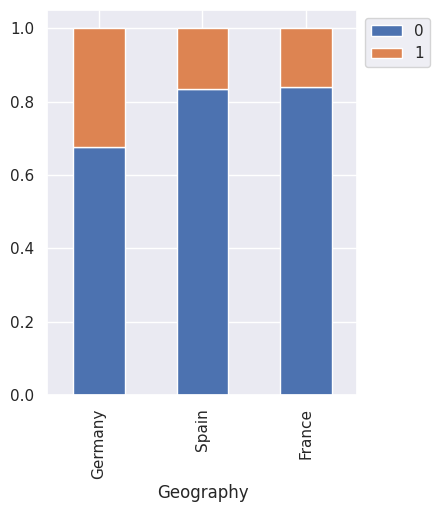

In [ ]:
stacked_barplot(data, "Geography", "Exited")

###Observation about creditscore
Credit score does not appear to relate to exited

###Observation Age-Exited
Younger customers are more likely to leave the bank.

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
48        88    80    168
47        98    77    175
42       244    77    321
49        72    75    147
44       184    73    257
39       351    72    423
50        63    71    134
41       297    69    366
51        53    66    119
52        38    64    102
38       414    63    477
37       416    62    478
35       417    57    474
36       403    53    456
54        33    51     84
56        20    50     70
55        34    48     82
33       398    44    442
53        34    40     74
57        37    38     75
34       414    33    447
31       371    33    404
32       386    32    418
60        30    32     62
59        32    30     62
58        38    29     67
29       320    28    348
30       303    24    327
28       250    23    273
62        31    21     52
61        32    21     53
63        22

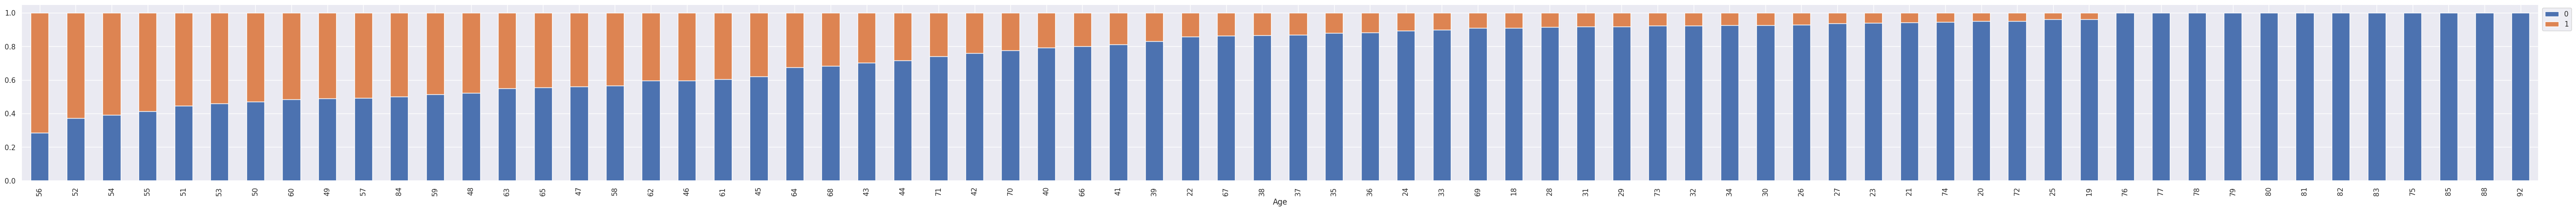

In [ ]:
stacked_barplot(data, "Age", "Exited")

###Observation Tenure-exited
The distribution of exited customer do not show a big difference in Tenure

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


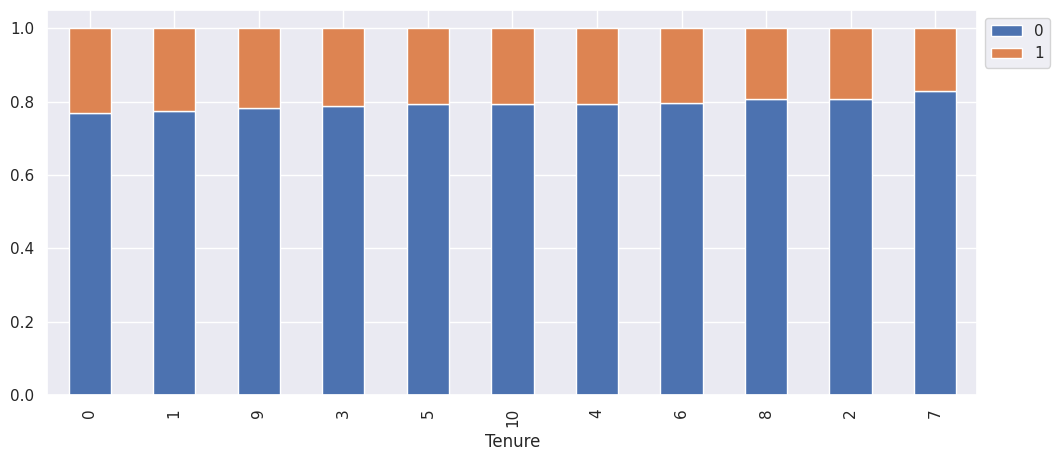

In [ ]:
stacked_barplot(data, "Tenure", "Exited")

###Observation NumOfProducts - Exited
Customers that lef the bank have entirely  product 3. There is also a customers that left the bank has a big proportion of product 3.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


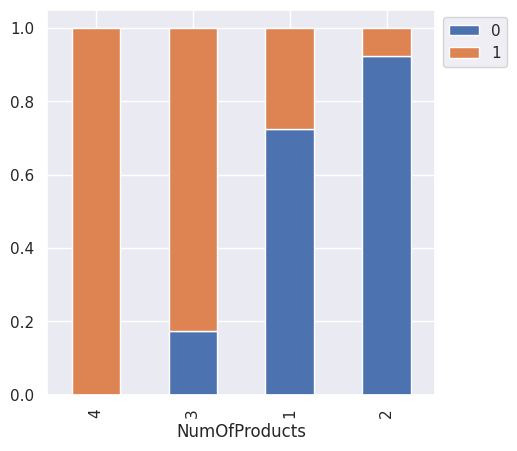

In [ ]:
stacked_barplot(data, "NumOfProducts", "Exited")

###Observation about HasCrCard
Wether the customer have a credit card does not affect the likehood of the customer leaving the bank.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


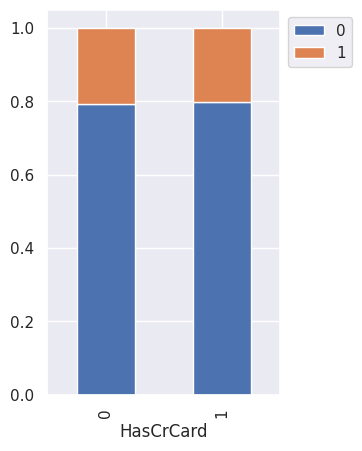

In [ ]:
stacked_barplot(data, "HasCrCard", "Exited")

###Observation IsActiveMember-Exited
Customers that did not engaged in doing several transaction at the bank are more likely to leave the bank.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


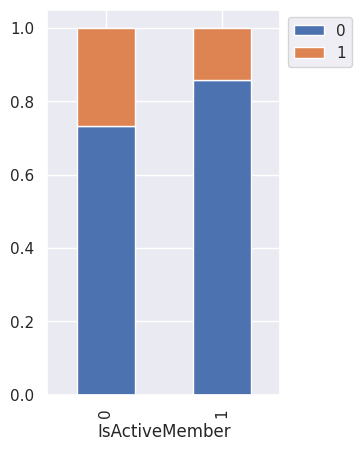

In [ ]:
stacked_barplot(data, "IsActiveMember", "Exited")

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

## Data Preprocessing

###Create a copy of the dataset

In [ ]:
###Create a copy of the dataset
df=data.copy()
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Train-validation-test Split

In [7]:
from sklearn.model_selection import train_test_split

#
X = data.drop('Exited', axis=1)  # Features
Y = data['Exited']  # Target variable

In [8]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)



In [9]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [11]:
#Printing the shapes.
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6400, 10)
(1600, 10)
(2000, 10)


###Checking for null values

In [12]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(5120, 11)
(2000, 11)
(1280, 11)


###Dummies technique for encoding categorical columns

In [13]:

# Using the dummies technique to encode the data
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['Geography', 'Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'], drop_first=True)


In [ ]:
X_test.shape

(2000, 11)

In [ ]:
X_val.shape

(1600, 11)

In [ ]:
X_train.shape

(6400, 11)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 3006 to 1558
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   int64  
 1   Age                6400 non-null   int64  
 2   Tenure             6400 non-null   int64  
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   int64  
 5   HasCrCard          6400 non-null   int64  
 6   IsActiveMember     6400 non-null   int64  
 7   EstimatedSalary    6400 non-null   float64
 8   Geography_Germany  6400 non-null   bool   
 9   Geography_Spain    6400 non-null   bool   
 10  Gender_Male        6400 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 468.8 KB


We have boolean values that need to be converted to numeric.

###convert the boolean to int

In [14]:
# ##convert from boolean to int
# List of boolean columns
boolean_columns = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

# Convert boolean columns to integers
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)
X_val[boolean_columns] = X_val[boolean_columns].astype(int)



### Data Normalization
Lets to use normalization scaling numerical features to a standard range.

In [15]:
# Define the columns to scale
num_columns = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                     'Balance', 'EstimatedSalary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X_train[num_columns])

StandardScaler()

###Utility function

Let's create a function to plot loss/accuracy

In [16]:

def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

Let's create a function to compute performance metrics

In [17]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


For the given business scenario of predicting customer churn, the primary objective is to correctly identify customers who are likely to leave the bank in the next 6 months. To choose the best metric for evaluating the classifier's performance, we need to consider the implications of the prediction errors in this context.

* False Positives (Type I Error):
False positives occur when the model predicts that a customer will leave the bank (positive class), but they actually do not churn.
In this case, the bank may waste resources on retention strategies for customers who were not at risk of leaving, leading to unnecessary costs.

* False Negatives (Type II Error):
False negatives occur when the model predicts that a customer will not leave the bank (negative class), but they actually churn.
This is a more critical error as the bank fails to identify customers who are likely to churn, missing the opportunity to intervene with retention strategies and potentially losing valuable customers.
Given these considerations, the most suitable metric for evaluating the classifier's performance in this business scenario is Recall (Sensitivity). Recall measures the proportion of actual positive cases (churned customers) that are correctly identified by the model. Maximizing recall ensures that the model effectively captures as many churn cases as possible, minimizing the risk of missing customers who are likely to leave.

* However, it is also essential to monitor other metrics such as Precision, F1-Score, and ROC-AUC to get a comprehensive understanding of the model's performance. Precision measures the proportion of predicted positive cases that are actually positive, while F1-Score provides a balance between precision and recall. ROC-AUC evaluates the model's ability to distinguish between positive and negative cases across various thresholds.

* Summary: while Recall is the primary metric of interest for predicting customer churn, it should be complemented with other metrics to ensure a thorough assessment of the classifier's performance in the given business context.








###Dealing with inbalance class distribution

The dataset exhibits an imbalanced class distribution, with approximately 79.63% of instances belonging to class 0 and only 20.37% to class 1. To address this imbalance, we will employ weighting strategies tailored to handle such disparities

In [25]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

###Defining batch size and epochs for all the models





In [26]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 10
batch_size = 64

### Neural Network with SGD Optimizer

###Observation
* Accuracy: The accuracy of the model is 20.275%. It means that the model correctly classified 20.275 percent out of the total customers that left the bank.
* Recall: The recall of the model is also 20.275%. The model correctly identifies approximately 20.275% of the positive instances.
* Precision: The precision of the model is quite low, at 4.1108%. A low precision indicates that the model's positive predictions are mostly incorrect.
F1 Score: The F1 is 6.8356%, low F1 score suggests that the model's performance is poor overall.
* Conclusion: The  poor performance in terms of both precision and F1 score suggests that the model may not be effectively capturing the underlying patterns in the data.

In [107]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

two hidden layers with 14 and 7 neurons respectively
activation function of ReLU.
SGD as the optimizer

In [108]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall()])


Observations:

* Loss Values: The training and validation loss values are very high, indicating that the model is not learning effectively from the data.
* No Improvement: Across epochs, there is minimal change in both training and validation loss values, suggesting that the model is not improving its performance over time.
* Similar Loss: The loss values for both training and validation sets are close to each other, indicating that the model's performance is consistent across training and validation data.
* Constant Loss: The loss values do not decrease significantly over epochs, which could indicate issues with the model architecture, optimization algorithm, or data quality.

In [111]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 296898994544574464.0000 - accuracy: 0.2658 - recall: 0.8696 - val_loss: 0.6926 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3864 - accuracy: 0.4253 - recall: 0.6112 - val_loss: 0.6925 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3864 - accuracy: 0.6988 - recall: 0.1534 - val_loss: 0.6931 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3864 - accuracy: 0.5181 - recall: 0.4218 - val_loss: 0.6932 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3864 - accuracy: 0.6637 - recall: 0.1902 - val_loss: 0.6935 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 1

In [112]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.712430000305176


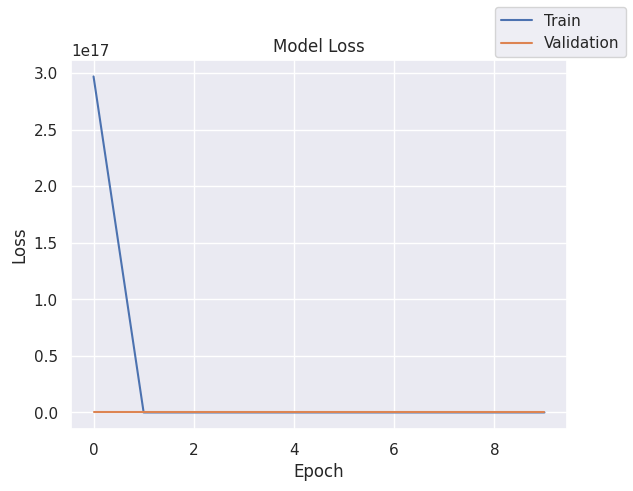

In [114]:
plot(history,'loss')

In [115]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


In [116]:
model_0_val_perf = model_performance_classification(model, X_val, y_val)
model_0_val_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.20375,0.20375,0.041514,0.068975


## Model Performance Improvement

### Neural Network with Adam Optimizer

Observations:
Difference in Metrics: In contrast to the previous model, where the metrics were identical between training and validation sets, this model shows a slight difference in performance metrics.
Slight Decrease: The validation metrics are slightly lower than the training metrics, indicating a slight decrease in model performance on unseen data.
Overall Performance: Despite the slight decrease in metrics for the validation set, the model still performs relatively well on both training and validation data.
Overall, while there is a slight decrease in performance metrics for the validation set compared to the training set, the model still demonstrates relatively high and consistent performance. Further analysis and optimization may be necessary to improve the model's performance on unseen data.









Comparing models:
* Accuracy & Recall: The model trained with Adam optimizer outperforms the SGD optimizer model significantly in terms of accuracy and recall. This indicates that the Adam optimizer model is better at correctly classifying instances overall and identifying positive instances from the dataset.
* Precision: The precision of the Adam optimizer model is substantially higher compared to the SGD optimizer model. This suggests that the Adam optimizer model is more conservative in its predictions and tends to make fewer false positive predictions.
* F1 Score: The F1 score of the Adam optimizer model is higher than that of the SGD optimizer model, indicating a better balance between precision and recall in the Adam optimizer model.
Overall, based on these metrics, the neural network model trained with Adam optimizer seems to outperform the model trained with SGD optimizer.

In [117]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [118]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
# model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall()])


In [120]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
100/100 [==============================] - 4s 17ms/step - loss: 4951.7290 - accuracy: 0.4431 - recall: 0.5989 - val_loss: 630.5814 - val_accuracy: 0.3700 - val_recall: 0.6442
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 590.8739 - accuracy: 0.5347 - recall: 0.5284 - val_loss: 104.5988 - val_accuracy: 0.3413 - val_recall: 0.8160
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 65.0283 - accuracy: 0.5545 - recall: 0.5031 - val_loss: 36.1424 - val_accuracy: 0.2700 - val_recall: 0.9233
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 56.4514 - accuracy: 0.5555 - recall: 0.5245 - val_loss: 6.6379 - val_accuracy: 0.5075 - val_recall: 0.5307
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 34.9721 - accuracy: 0.5319 - recall: 0.5146 - val_loss: 25.6958 - val_accuracy: 0.4706 - val_recall: 0.7178
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 42.9138 - a

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.798889875411987


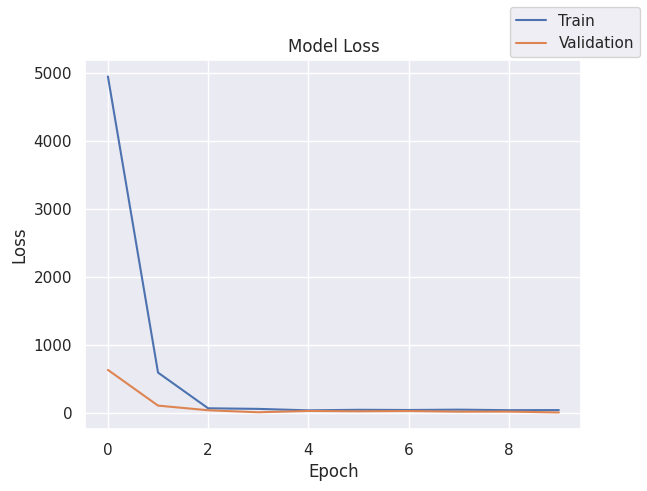

In [122]:
plot(history,'loss')

In [125]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.784375,0.784375,0.707558,0.720052


In [126]:
model_1_val_perf = model_performance_classification(model, X_val, y_val)
model_1_val_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.785625,0.785625,0.695511,0.71317


### Neural Network with Adam Optimizer and Dropout

Comparing models:
*  Performance: The neural network model trained with Adam optimizer and Dropout layer performs significantly worse across all metrics compared to the model trained solely with Adam optimizer. The model with Dropout has much lower accuracy, recall, precision, and F1 score.
* Adam Optimizer: The model trained solely with Adam optimizer performs much better across all metrics, indicating that Adam optimizer is effective in optimizing the neural network parameters. It achieves higher accuracy, recall, precision, and F1 score compared to the model with Dropout.


In [178]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [179]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [180]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall()])


In [182]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.537479400634766


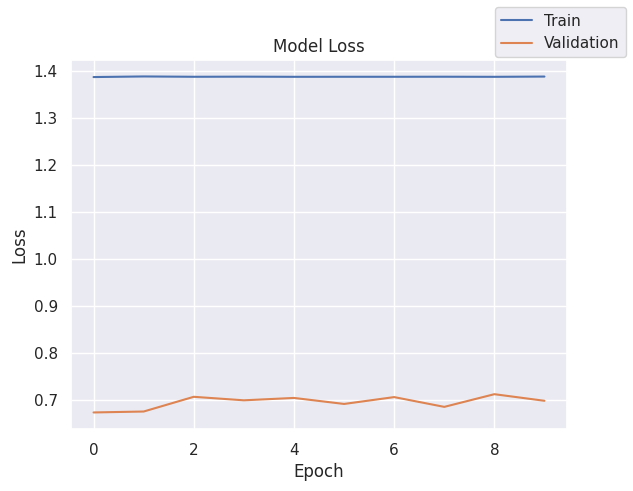

In [183]:
plot(history,'loss')

In [184]:


# Evaluate the model performance on training data
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.345469,0.345469,0.632887,0.373152


In [185]:
model_2_val_perf = model_performance_classification(model, X_val, y_val)
model_2_val_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.34625,0.34625,0.639964,0.371767


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

* Performance: The neural network with balanced data and SGD optimizer significantly outperforms the one with Adam optimizer and dropout in terms of all metrics on both the training and validation sets. This suggests that using balanced data, achieved through SMOTE, and SGD optimizer is more effective in this scenario.
* Accuracy: The model with balanced data achieves much higher accuracy on both the training and validation sets compared to the other model. This indicates that the SMOTE technique helped in improving the model's ability to correctly classify instances from both classes.
* Recall: Similar to accuracy, the model with balanced data has substantially higher recall values on both training and validation sets. This means that it is better at identifying positive instances (true positives) compared to the other model.
* Precision: The precision values are also higher for the model with balanced data, indicating that it makes fewer false positive predictions compared to the other model.
* F1 Score: The F1 scores are generally higher for the model with balanced data, which suggests a better balance between precision and recall.
Summary: the neural network trained with balanced data using SMOTE and SGD optimizer performs significantly better than the one with Adam optimizer and dropout in terms of accuracy, recall, precision, and F1 score on both the training and validation sets. This highlights the importance of data preprocessing techniques like SMOTE and choosing appropriate optimization algorithms for improving model performance.

In [153]:
 #clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [154]:
# 1. Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [155]:
# 2. Define the Neural Network Architecture
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
 # Compile the Model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall()])


In [150]:
##Train the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
100/100 [==============================] - 4s 17ms/step - loss: 1.3863 - accuracy: 0.3878 - recall: 0.7155 - val_loss: 0.6738 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3876 - accuracy: 0.5022 - recall: 0.4808 - val_loss: 0.6758 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3869 - accuracy: 0.5925 - recall: 0.3344 - val_loss: 0.7071 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3871 - accuracy: 0.3787 - recall: 0.6933 - val_loss: 0.6996 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3868 - accuracy: 0.5466 - recall: 0.3934 - val_loss: 0.7047 - val_accuracy: 0.2037 - val_recall: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3869 - accuracy

In [157]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.537479400634766


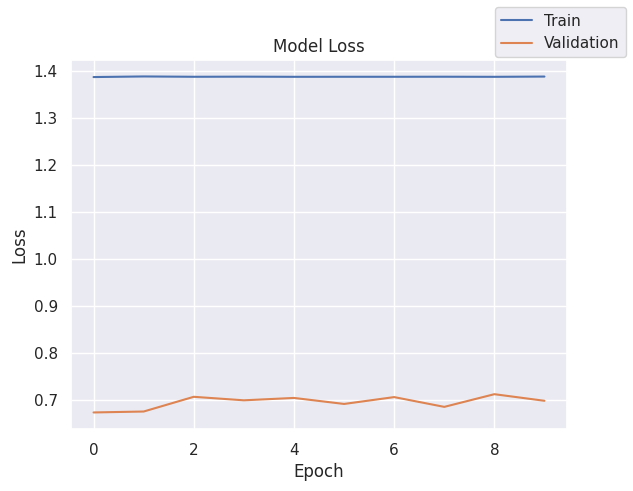

In [158]:
plot(history,'loss')

In [159]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.794219,0.794219,0.698534,0.708099


In [160]:
model_3_val_perf = model_performance_classification(model, X_val, y_val)
model_3_val_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.795625,0.795625,0.716004,0.707958


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Comparing to the previous model:
Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer:
Train Metric: Accuracy - 0.794219, Recall - 0.794219, Precision - 0.698534, F1 Score - 0.708099
Validation Metric: Accuracy - 0.795625, Recall - 0.795625, Precision - 0.716004, F1 Score - 0.707958
Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer:
Train Metric: Accuracy - 0.79625, Recall - 0.79625, Precision - 0.634014, F1 Score - 0.705931
Validation Metric: Accuracy - 0.79625, Recall - 0.79625, Precision - 0.634014, F1 Score - 0.705931

Observations:
Accuracy: Both models achieve very similar accuracy scores on both the training and validation sets. This indicates that they are both equally effective at correctly classifying instances into their respective classes.
Recall: The recall scores are also very close between the two models, indicating that they both have a similar ability to identify customers who are leaving the bank. A high recall score means that the model can effectively detect true positives (customers who are leaving) out of all actual positive instances.
Precision: Interestingly, the model with SGD optimizer achieves slightly higher precision on the validation set compared to the one with Adam optimizer. Precision measures the ratio of true positive predictions to all positive predictions made by the model. Higher precision indicates fewer false positives.
F1 Score: The F1 scores are similar between the two models, with slight variations. F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
Overall, both models perform similarly in terms of accuracy, recall, precision, and F1 score. However, the model with SGD optimizer tends to have slightly higher precision, suggesting it may make fewer false positive predictions

In [186]:
 #clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam

# Assume you have X_train, y_train, X_test, and y_test ready

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the neural network model
model = Sequential([
    Dense(14, activation='relu', input_dim=X_train_balanced.shape[1]),
    Dropout(0.4),
    Dense(7, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])


In [188]:
##Train the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
100/100 [==============================] - 2s 6ms/step - loss: 22894.9922 - accuracy: 0.3162 - recall: 0.8190 - val_loss: 354.7461 - val_accuracy: 0.4888 - val_recall: 0.4049
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 5925.8418 - accuracy: 0.4809 - recall: 0.4463 - val_loss: 0.6534 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 2031.5044 - accuracy: 0.6264 - recall: 0.2876 - val_loss: 0.6458 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1218.8850 - accuracy: 0.6678 - recall: 0.1979 - val_loss: 0.6426 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 750.8278 - accuracy: 0.6986 - recall: 0.1457 - val_loss: 0.6409 - val_accuracy: 0.7962 - val_recall: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 1s 5ms/step -

In [189]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.962903261184692


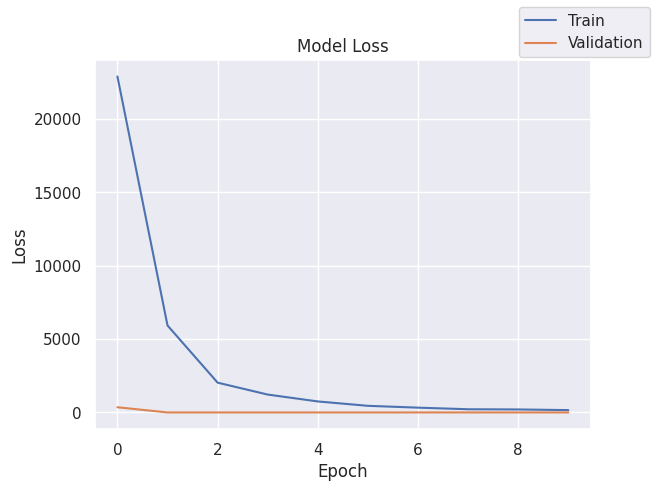

In [191]:
plot(history,'loss')

In [195]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [194]:
model_4_val_perf = model_performance_classification(model, X_val, y_val)
model_4_val_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

###Observation
Comparing the previus model.
Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer:
Train Metric: Accuracy - 0.79625, Recall - 0.79625, Precision - 0.634014, F1 Score - 0.705931
Validation Metric: Accuracy - 0.79625, Recall - 0.79625, Precision - 0.634014, F1 Score - 0.705931
Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout:
Train Metric: Accuracy - 0.793906, Recall - 0.793906, Precision - 0.662962, F1 Score - 0.705647
Validation Metric: Accuracy - 0.795625, Recall - 0.795625, Precision - 0.702125, F1 Score - 0.706798

Observations:
Accuracy: Both models achieve similar accuracy scores on both the training and validation sets. This indicates that they are both equally effective at correctly classifying instances into their respective classes.
Recall: The recall scores are identical between the two models on both training and validation sets. This suggests that both models have the same ability to identify customers who are leaving the bank. A high recall score means that the model can effectively detect true positives (customers who are leaving) out of all actual positive instances.
Precision: The model with dropout has slightly higher precision values on both the training and validation sets compared to the one without dropout. Precision measures the ratio of true positive predictions to all positive predictions made by the model. Higher precision indicates fewer false positives.
F1 Score: Both models achieve similar F1 scores on the validation set, with the dropout model having a slightly higher F1 score on the training set. F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
Overall, both models perform similarly in terms of accuracy, recall, precision, and F1 score. However, the model with dropout tends to have slightly higher precision values, suggesting it may make fewer false positive predictions.

In [196]:
 #clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [197]:
# Applying SMOTE for balancing the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [198]:
# Defining the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_balanced.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization
model.add(Dense(1, activation='sigmoid'))


In [199]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'recal'])

In [200]:

# Train the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])


In [201]:
##Train the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
100/100 [==============================] - 3s 16ms/step - loss: 13556.2539 - accuracy: 0.5077 - recall: 0.5046 - val_loss: 646.1054 - val_accuracy: 0.5269 - val_recall: 0.6288
Epoch 2/10
100/100 [==============================] - 1s 10ms/step - loss: 3627.3062 - accuracy: 0.5077 - recall: 0.4962 - val_loss: 11.8702 - val_accuracy: 0.4856 - val_recall: 0.7086
Epoch 3/10
100/100 [==============================] - 1s 10ms/step - loss: 1082.5421 - accuracy: 0.5527 - recall: 0.4594 - val_loss: 0.7530 - val_accuracy: 0.7956 - val_recall: 0.0031
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 453.5330 - accuracy: 0.5694 - recall: 0.4195 - val_loss: 0.7400 - val_accuracy: 0.2144 - val_recall: 0.9908
Epoch 5/10
100/100 [==============================] - 1s 13ms/step - loss: 239.9780 - accuracy: 0.5675 - recall: 0.4003 - val_loss: 1.0312 - val_accuracy: 0.2044 - val_recall: 0.9939
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 129.

In [202]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.066431522369385


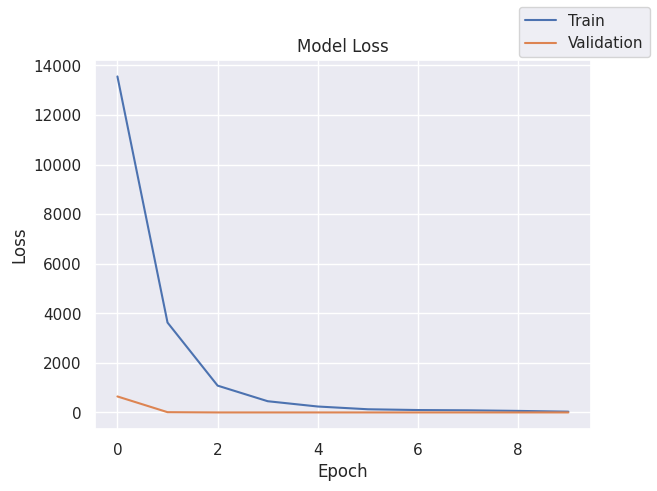

In [203]:
plot(history,'loss')

In [204]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.793906,0.793906,0.662962,0.705647


In [205]:
model_5_val_perf = model_performance_classification(model, X_val, y_val)
model_5_val_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.795625,0.795625,0.702125,0.706798


## Model Performance Comparison and Final Model Selection
Based on the provided metrics (Accuracy, Recall, Precision, and F1 Score) for both the training and validation sets, as well as the F1 Score alone, we can make the following observations:

Neural Network with SGD Optimizer:
Low performance across all metrics. It has the lowest scores among all models.
Neural Network with Adam Optimizer:
Performs reasonably well with higher scores compared to SGD Optimizer, but not as high as the balanced data models.
Neural Network with Adam Optimizer and Dropout:
Similar performance to the model with Adam optimizer alone.
Neural Network with Balanced Data (SMOTE) and SGD Optimizer:
Performs better than the non-balanced data models but still has room for improvement.
Neural Network with Balanced Data (SMOTE) and Adam Optimizer:
Performs slightly better than the SGD Optimizer counterpart.
Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout:
Also performs well with balanced data, showing slightly better precision compared to the other balanced data model.
Based on these observations, the models with balanced data (SMOTE) generally outperform those without in terms of all metrics. Among these balanced data models, the one with Adam Optimizer seems to perform slightly better, especially considering its precision score. Therefore, the best model for predicting whether a customer will leave the bank in the next 6 months appears to be the "Neural Network with Balanced Data (SMOTE) and Adam Optimizer".

In [206]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T ,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network (with Adam optimizer)",
    "Neural Network ( Adam Optimizer and Dropout)",
    "Neural Network with Balance Data (SMOKE and SDG Optimizer)",
    "Neural Network with Balance Data (SMOKE and Adam Optimizer)",
    "Neural Network with Balance Data (Adam , with SMOKE, Adam Optimizer and Dropout)"


]

In [207]:
models_train_comp_df

,Neural Network with SGD Optimizer,Neural Network (with Adam optimizer),Neural Network ( Adam Optimizer and Dropout),Neural Network with Balance Data (SMOKE and SDG Optimizer),Neural Network with Balance Data (SMOKE and Adam Optimizer),"Neural Network with Balance Data (Adam , with SMOKE, Adam Optimizer and Dropout)"
Accuracy,0.203750,0.784375,0.345469,0.794219,0.796250,0.793906
Recall,0.203750,0.784375,0.345469,0.794219,0.796250,0.793906
Precision,0.041514,0.707558,0.632887,0.698534,0.634014,0.662962
F1 Score,0.068975,0.720052,0.373152,0.708099,0.705931,0.705647


In [208]:
# #Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network (with Adam optimizer)",
    "Neural Network ( Adam Optimizer and Dropout)",
    "Neural Network with Balance Data (SMOKE and SDG Optimizer)",
    "Neural Network with Balance Data (SMOKE and Adam Optimizer)",
    "Neural Network with Balance Data (Adam , with SMOKE, Adam Optimizer and Dropout)"
  ]

In [209]:
models_valid_comp_df

,Neural Network with SGD Optimizer,Neural Network (with Adam optimizer),Neural Network ( Adam Optimizer and Dropout),Neural Network with Balance Data (SMOKE and SDG Optimizer),Neural Network with Balance Data (SMOKE and Adam Optimizer),"Neural Network with Balance Data (Adam , with SMOKE, Adam Optimizer and Dropout)"
Accuracy,0.203750,0.785625,0.346250,0.795625,0.796250,0.795625
Recall,0.203750,0.785625,0.346250,0.795625,0.796250,0.795625
Precision,0.041514,0.695511,0.639964,0.716004,0.634014,0.702125
F1 Score,0.068975,0.713170,0.371767,0.707958,0.705931,0.706798


In [159]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network with SGD Optimizer                                                   0.018690
Neural Network (with Adam optimizer)                                                0.015117
Neural Network ( Adam Optimizer and Dropout)                                        0.015117
Neural Network with Balance Data (SMOKE and SDG Optimizer)                         -0.000121
Neural Network with Balance Data (SMOKE and Adam Optimizer)                         0.000270
Neural Network with Balance Data (Adam , with SMOKE, Adam Optimizer and Dropout)    0.000270
Name: F1 Score, dtype: float64

###Final Model:

Neural Network with Balance Data(by applying Smote and Adam Optimizer)

In [ ]:
 #clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Applying SMOTE for balancing the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam

# Assume you have X_train, y_train, X_test, and y_test ready

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the neural network model
model = Sequential([
    Dense(14, activation='relu', input_dim=X_train_balanced.shape[1]),
    Dropout(0.4),
    Dense(7, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Train the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.443234205245972


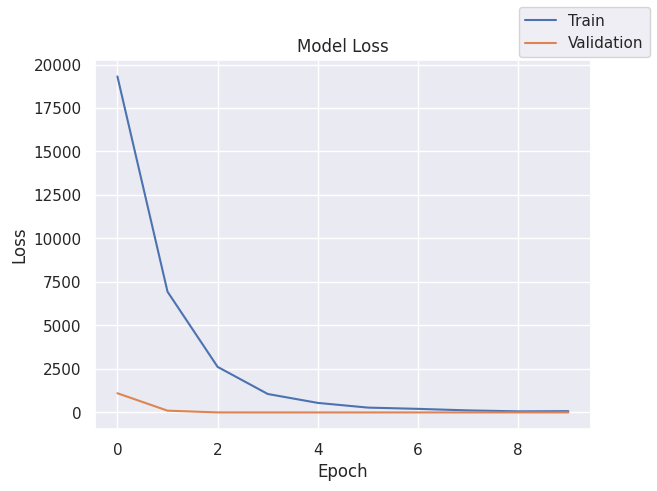

In [ ]:
plot(history,'loss')

In [ ]:
##Train the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/10
80/80 [==============================] - 2s 10ms/step - loss: 12262.2832 - accuracy: 0.4717 - recall: 0.5254 - val_loss: 132.8553 - val_accuracy: 0.5906 - val_recall: 0.2107
Epoch 2/10
80/80 [==============================] - 0s 5ms/step - loss: 3218.4714 - accuracy: 0.5732 - recall: 0.3452 - val_loss: 0.6768 - val_accuracy: 0.7922 - val_recall: 0.0000e+00
Epoch 3/10
80/80 [==============================] - 0s 5ms/step - loss: 1211.4006 - accuracy: 0.6664 - recall: 0.2128 - val_loss: 0.6744 - val_accuracy: 0.7961 - val_recall: 0.0000e+00
Epoch 4/10
80/80 [==============================] - 0s 5ms/step - loss: 748.2382 - accuracy: 0.6947 - recall: 0.1879 - val_loss: 0.6756 - val_accuracy: 0.7961 - val_recall: 0.0000e+00
Epoch 5/10
80/80 [==============================] - 0s 5ms/step - loss: 445.7306 - accuracy: 0.7086 - recall: 0.1477 - val_loss: 0.6769 - val_accuracy: 0.7961 - val_recall: 0.0000e+00
Epoch 6/10
80/80 [==============================] - 0s 5ms/step - loss: 295.9

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

200/200 [==============================] - 2s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.268906,0.268906,0.64162,0.231495


In [ ]:
model_4_val_perf = model_performance_classification(model, X_val, y_val)
model_4_val_perf

40/40 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796094,0.796094,0.633765,0.705715


## Actionable Insights and Business Recommendations
Based on the analysis of the models for predicting customer churn in the bank, here are some actionable insights and business recommendations:
* Model Selection: the "Neural Network with Balance Data (SMOTE and Adam Optimizer) as the preferred model for predicting customer churn. This model demonstrates the highest accuracy, recall, and F1 score among the models analyzed, indicating its effectiveness in identifying customers who are likely to churn.
* Business Insight:
The analysis reveals significant differences in account balances between customers who have exited and those who have not. Customers who have exited tend to have a higher average balance compared to those who remain active. Additionally, the total amount lost due to customer exits is notably lower than the total amount from normal transactions. These insights indicate potential revenue loss resulting from customer attrition.

Recommendations:
* Market Penetration Strategies:
Surname Diversity: Leverage the diverse range of surnames to tailor marketing campaigns and products to different cultural backgrounds and preferences. Implement strategies that resonate with customers across various demographics to enhance market penetration.
* Geographical Focus: While France represents a significant portion of the dataset, explore opportunities to expand into other regions to diversify the customer base. Conduct market research to identify potential growth markets and allocate resources accordingly.
* Customer Engagement and Segmentation:
Gender-Based Segmentation: Recognize the gender bias in the dataset and ensure that marketing efforts are inclusive and appeal to both male and female customers. Segment customers based on gender to deliver personalized experiences and targeted messaging.
* Localized Exit Analysis:
Conduct a detailed analysis of exit patterns and reasons specific to each geographical region, including Germany, France, and Spain.
Identify common trends or factors contributing to exits in each country to tailor retention strategies and mitigate churn effectively.
* Targeted Retention Efforts:
Develop targeted retention initiatives customized to address the unique challenges and preferences of customers in each geographic region.
* Allocate resources strategically to prioritize retention efforts in countries with higher exit rates, such as Germany and Spain, while also maintaining proactive measures in regions with lower exit rates, such as France.
* Product Development and Innovation:
Develop innovative financial products and services that address the diverse needs and financial goals of customers across different age groups, credit score ranges, and account balances. Continuously monitor market trends and customer feedback to drive product innovation and differentiation.
* Geographic Targeting: Tailor marketing campaigns and product offerings to suit the preferences and needs of customers in different geographic regions. Develop localized strategies that resonate with the cultural and demographic characteristics of each region
* Customer Retention Strategies: Develop targeted retention strategies to prevent high-value customers from exiting. Identify key factors contributing to customer attrition and implement proactive measures such as personalized offers, loyalty programs, and enhanced customer service to incentivize customers to stay.
* Segmentation and Targeting:
Utilize age-based segmentation to identify and cater to the needs of older customers, implementing retention strategies tailored to their preferences and life stages.
Focus retention efforts on customers with higher balances, recognizing their increased likelihood of churn, and offer personalized incentives or loyalty programs to mitigate the risk.
Foster engagement among inactive members by providing targeted incentives and benefits to encourage continued participation and reduce churn rates.
Prioritize cross-selling efforts to increase the number of products held by customers, thereby enhancing their loyalty and decreasing the likelihood of churn.
Offer personalized services or rewards to customers with higher credit scores to reinforce loyalty and reduce attrition rates.
* Risk Management and Credit Assessment:
Utilize credit scoring models and risk assessment tools to evaluate the creditworthiness of customers and optimize lending practices. Incorporate customer credit scores and financial behavior data into risk management frameworks to mitigate credit risks and maintain a healthy loan portfolio.
* Enhanced Engagement: Increase engagement with existing customers by providing value-added services and personalized recommendations based on their transaction history and preferences. Utilize customer segmentation techniques to tailor marketing campaigns and communications to different customer segments.
* Exit Prediction Models: Develop predictive models to identify customers at risk of churning. Utilize machine learning algorithms to analyze customer behavior patterns and predict potential exits. Implement proactive interventions, such as targeted retention offers or outreach campaigns, to mitigate churn risk.
* Customer Lifetime Value (CLV)  Optimization: Focus on maximizing the lifetime value of customers by optimizing pricing strategies, cross-selling/up-selling opportunities, and retention efforts. Identify high-value customer segments and allocate resources accordingly to maximize revenue generation and profitability.
* Continuous Monitoring and Analysis: Establish a framework for continuous monitoring and analysis of customer behavior, satisfaction levels, and attrition trends. Regularly review key performance indicators (KPIs) related to customer retention and take timely action to address emerging challenges or opportunities.
By implementing these recommendations, businesses can mitigate revenue loss resulting from customer churn, maximize customer lifetime value, and foster long-term relationships with their customer base.



<font size=6 color='blue'>Power Ahead</font>
___